## Context

We have developed a complex system of producing more and more animals that use more and more of our resources, while leaving a massive amount of waste, pollution and adverse climate change in their way. This notebook focuses on the environmental impacts of food.

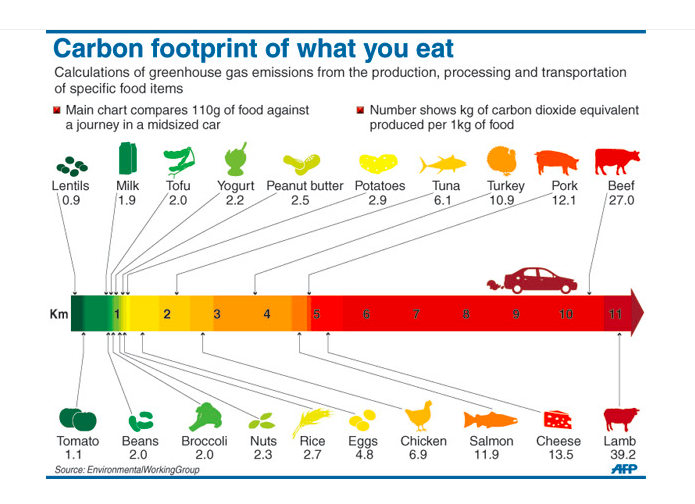

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls

%matplotlib inline

In [ ]:
df = pd.read_csv("../input/environment-impact-of-food-production/Food_Production.csv")
print(df.shape)

df.head()

In [ ]:
from collections import Counter

rows = df.shape[0]
columns = df.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

Counter(df.dtypes.values)

In [ ]:
df.info()

In [ ]:
df_info= pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})
df_info

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(range(df.shape[0]), np.sort(df.Total_emissions.values), s= 50)
plt.xlabel('index', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.show()

#### Only few of the foods contribute to most of the carbon footprint. Let's investigate which are the guilty ones.

In [ ]:
food_df= df.groupby("Food product")['Total_emissions'].sum().reset_index()

trace = go.Scatter(
    y = food_df.Total_emissions,
    x = food_df["Food product"],
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = food_df.Total_emissions*2,
        color = food_df.Total_emissions,
        colorscale='Portland',
        showscale=True
    )
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Total Emissions by Foods',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Total Emissions',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterplot')

#### 1. Looks like Beef is responsible for most of the greenhouse gas emissions.
#### 2. Plant based foods are hardly visible in the graph indicating their significanly low carbon footprint.

## Greenhouse gas emissions across the supply chain

### Stages of supply chain:
1. Land usage
2. Farm
3. Animal Feed 
4. Processing 
5. Transport
6. Retail
7. Packaging

In [ ]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]


fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()

### 1. Most of the greenhouse gas emissions happen in the farm which is way high for beef farming.

### 2. CO2 emissions from most plant based Foods are much lower than most animal based foods. #Govegan

### 3. Factors such as Transport, distance, retail , packaging are often small compared to importance of food type.

## LAND USE 
The amount of land required to produce food has wide variation depending upon the type of food. Let's compare the land use by foods in terms of amount of food produced per kg and nutrituional values like per 100gm/1000kcal protein.

In [ ]:
land_df= df.dropna().sort_values(by= 'Land use per 1000kcal (m² per 1000kcal)', ascending= True)[['Food product','Land use per 1000kcal (m² per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.show()

### Most of the land is used in the cultivation of beaf, Lamb & Mutton while all the plant based foods are at the bottom.

In [ ]:
land_df= df.dropna().sort_values(by= 'Land use per kilogram (m² per kilogram)', ascending= True)[['Food product',
       'Land use per kilogram (m² per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per Kg")
plt.title("Land Use by Foods per Kg \n", size= 20)
plt.show()

### Interestingly, More land is used by lamb & Mutton to produce same amount of food than beef.

## Water Usage

Water is a critical resource required for food production and other activities. It's important to know which types of food require more water to produce food. We will also investigate which types of food have high scarcity-weighted water usage meaning more usage of water in areas where water resource is scarce.

In [ ]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', ascending= True)[['Food product',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 20)
plt.show()

#### 1. Most of the Fresh water usage in litres per 1000 Kcal of food is done by Fish, Tomatoes and dairy products.

#### 2. Potatoes, root vegetables, coffee and Onions are some of the foods which require very less water to produce.

In [ ]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Freshwater withdrawals per kilogram (liters per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.show()

### Cheese and Nuts need more water to produce same amount(1 kg) of food than fish which takes more water if we compare them by amount of energy produced.

## Greenhouse Emissions

A greenhouse gas is a gas that absorbs and emits radiant energy within the thermal infrared range. Greenhouse gases cause the greenhouse effect on planets. The primary greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone.[WIKI](https://en.wikipedia.org/wiki/Greenhouse_gas)

Different Food have different carbon footprint across various stages of it's production and consumption. Let's compare.

In [ ]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 1000kcal")
plt.title("Greenhouse Gas Emission Per 1000kcal\n", size= 20)
plt.show()

#### 1. Coffee has the most carbon footprint per 1000kcal followed by beef which is not surprising. 

#### 2. Animal based foods produce around 50% more emissions than plant based foods like potatoes, apples, groundnuts.

In [ ]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.show()

### Dark chocolate has most carbon footprint in terms of nutritional values(per 100g protein). I am not eating chocolate anymore :D

## Scarcity-Weighted Water Use

Freshwater scarcity varies across the world: some regions have abundant water resources which does not impact agricultural demands while others experience severe water stress. Scarcity-weighted water use represents freshwater use weighted by local water scarcity.


In [ ]:
# comparing different foods by scarcity-weighted water required to produce 1 kg food

scarcity_df= df.dropna().sort_values(by= 'Scarcity-weighted water use per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Scarcity-weighted water use per kilogram (liters per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per kg')
plt.title('Scarcity-Weighted Water Use Per Kg', size= 20)
plt.show()

### To produce 1kg of food in water scarce areas, nuts and cheese use more water.

In [ ]:
# comparing different foods by scarcity-weighted water in terms of nutritional values

scarcity_df= df.dropna().sort_values(by= 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', ascending= True)[['Food product',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per 100g protein')
plt.title('Scarcity-weighted water use per 100g protein', size= 20)
plt.show()

### Apples and berries use more water in water scarce areas to produce same amount of nutritional content. It's an important insight to consider in areas where water is scarce.

## Eutrophication 
The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor to environmental pollution. Let's compare different foods in terms of eutrophication. [Link](https://en.wikipedia.org/wiki/Eutrophication)


In [ ]:
#comparing eutrophication emissions per 1000kcal

eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "black")
plt.xlabel('Eutrophication emissions Per 1000kcal')
plt.title('Eutrophication Emissions Per 1000kcal \n', size= 20)
plt.show()

### Coffee does the most eutrophication emission when compared by energy per 1000kcal. Plant based foods are at the bottom.

In [ ]:
#comparing eutrophication emissions of different foods required to produce 1 kg food

eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "black")
plt.xlabel('Eutrophication emissions Per Kg')
plt.title('Eutrophication Emissions Per Kg \n', size= 20)
plt.show()

### Animal based foods are most responsible for eutrophication emission to produce 1kg while plant-based foods contibute very less.

In [ ]:
plt.figure(figsize=(10,10))
temp_series = df.groupby('Food product')['Land use change'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution by emissions via Transport", fontsize=20)
plt.show()

### More than 50% of the emissions via land use are shared by beef and dark chocolate. It's a huge contribution in terms of land usage.

In [ ]:
plt.figure(figsize=(10,10))
temp_series = df.groupby('Food product')['Transport'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution by emissions via Transport", fontsize=20)
plt.show()

### Generally Emissions via transport are uniform across different foods with cane sugar having most share.

## Heatmap

In [ ]:
# To check the relation among different attributes of foods

corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, annot= True,cmap= "viridis")
plt.title("Correlation between variables \n", fontsize=20)
plt.show()

### There are many variables which are correlated with each other like Farm and Total emission.

### Conclusion:

### There is a common theme in this analysis. Animal based foods use more resources and have higher carbon footprint than plant based diets. Time to think about what you eat. Choose your food wisely and stay healthy!

## Please Upvote if you liked!